In [6]:
import numpy as np
import pandas as pd

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import joblib

In [10]:
df = pd.read_csv('dataset/Training_Essay_Data.csv')

In [11]:
print(df.head())

                                                text  generated
0  Car-free cities have become a subject of incre...          1
1  Car Free Cities  Car-free cities, a concept ga...          1
2    A Sustainable Urban Future  Car-free cities ...          1
3    Pioneering Sustainable Urban Living  In an e...          1
4    The Path to Sustainable Urban Living  In an ...          1


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29145 entries, 0 to 29144
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       29145 non-null  object
 1   generated  29145 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 455.5+ KB
None


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['generated'], test_size=0.2, random_state=42)

In [14]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [15]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(X_test_tfidf)
y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]

In [17]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9909
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3539
           1       1.00      0.98      0.99      2290

    accuracy                           0.99      5829
   macro avg       0.99      0.99      0.99      5829
weighted avg       0.99      0.99      0.99      5829



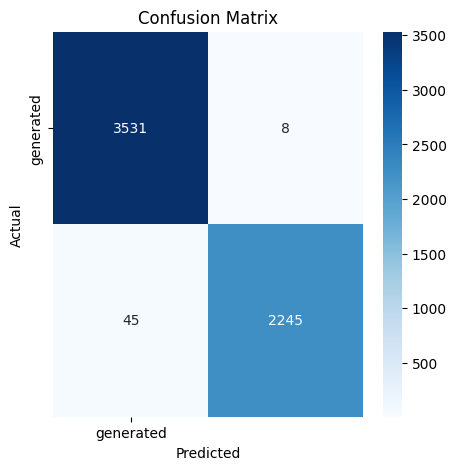

In [18]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['generated'], yticklabels=['generated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
joblib.dump(model, 'lr_ai_text_generated_detection.pkl')
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']